In [2]:
import pandas as pd
import numpy as np

Data Loading and Exploration:

In [25]:
import pandas as pd

# Replace with your modified Google Drive link
file_url = "/IMDB Movie Reviews.csv"

df = pd.read_csv(file_url)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [26]:
df.head(3)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive


In [ ]:
df.tail(3)

,review,sentiment
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [ ]:
df.shape

(50000, 2)

In [ ]:
df.dtypes

review       object
sentiment    object
dtype: object

In [ ]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [32]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [27]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import spacy
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob

In [33]:
def clean_and_process_text(text):
    # Step 1: Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # Step 2: Remove punctuation and special characters
    pattern = '\w+'
    text = ' '.join(re.findall(pattern, text))

    # Step 3: Convert text to lowercase
    text = text.lower()

    # Step 4: Tokenize the cleaned text
    tokens = word_tokenize(text)

    # Step 5: Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]



    # Step 6: Perform lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return tokens



In [34]:
# Example usage
sample_text = "<p>This is a <b>sample</b> review text.</p>"
processed_text = clean_and_process_text(sample_text)
print(processed_text)


['sample', 'review', 'text']


In [35]:
df['clean_and_process_text_reviews'] = df['review'].apply(clean_and_process_text)

<ipython-input-33-e2b1bed735e9>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


In [ ]:
df['clean_and_process_text_reviews']

0        [one, reviewer, mentioned, watching, 1, oz, ep...
1        [wonderful, little, production, filming, techn...
2        [thought, wonderful, way, spend, time, hot, su...
3        [basically, family, little, boy, jake, think, ...
4        [petter, mattei, love, time, money, visually, ...
                               ...                        
49995    [thought, movie, right, good, job, creative, o...
49996    [bad, plot, bad, dialogue, bad, acting, idioti...
49997    [catholic, taught, parochial, elementary, scho...
49998    [going, disagree, previous, comment, side, mal...
49999    [one, expects, star, trek, movie, high, art, f...
Name: clean_and_process_text_reviews, Length: 50000, dtype: object

In [36]:
import spacy
from textblob import TextBlob

# Load the Spacy model
nlp = spacy.load("en_core_web_sm")

def analyze_text(text):
    # Create a TextBlob object
    blob = TextBlob(text)

    # Spelling correction
    corrected_text = str(blob.correct())

    # Apply Spacy NLP model
    doc = nlp(corrected_text)

    # Initialize counts
    noun_count = 0
    verb_count = 0

    # Count nouns and verbs
    for token in doc:
        if token.pos_ == "NOUN":
            noun_count += 1
        elif token.pos_ == "VERB":
            verb_count += 1

    # Analyze polarity and subjectivity
    sentiment = blob.sentiment
    polarity = sentiment.polarity
    subjectivity = sentiment.subjectivity

    return {
        "original_text": text,
        "corrected_text": corrected_text,
        "noun_count": noun_count,
        "verb_count": verb_count,
        "polarity": polarity,
        "subjectivity": subjectivity
    }

# Example usage
text = "I am lernning to rite code. It's very intresting and chalenging."
result = analyze_text(text)

print(f"Original Text: {result['original_text']}")
print(f"Corrected Text: {result['corrected_text']}")
print(f"Noun Count: {result['noun_count']}")
print(f"Verb Count: {result['verb_count']}")
print(f"Polarity: {result['polarity']}")
print(f"Subjectivity: {result['subjectivity']}")


Original Text: I am lernning to rite code. It's very intresting and chalenging.
Corrected Text: I am leaning to rite code. It's very interesting and challenging.
Noun Count: 1
Verb Count: 2
Polarity: 0.2
Subjectivity: 0.3


In [41]:
# Convert each list in 'list_column' to a single string
df['clean_and_process_text_reviews_string'] = df['clean_and_process_text_reviews'].apply(lambda x: ' '.join(x))

In [42]:
df.head(2)

,review,sentiment,clean_and_process_text_reviews,clean_and_process_text_reviews_string_analysis,clean_and_process_text_reviews_string
0,One of the other reviewers has mentioned that ...,positive,"['one', 'reviewer', 'mentioned', 'watching', '...",one reviewer mentioned watching 1 oz episode h...,"[ ' o n e ' , ' r e v i e w e r ' , ' m e ..."
1,A wonderful little production. <br /><br />The...,positive,"['wonderful', 'little', 'production', 'filming...",wonderful little production filming technique ...,"[ ' w o n d e r f u l ' , ' l i t t l e ' , ..."


In [ ]:
df['clean_and_process_text_reviews']

0        [one, reviewer, mentioned, watching, 1, oz, ep...
1        [wonderful, little, production, filming, techn...
2        [thought, wonderful, way, spend, time, hot, su...
3        [basically, family, little, boy, jake, think, ...
4        [petter, mattei, love, time, money, visually, ...
                               ...                        
49995    [thought, movie, right, good, job, creative, o...
49996    [bad, plot, bad, dialogue, bad, acting, idioti...
49997    [catholic, taught, parochial, elementary, scho...
49998    [going, disagree, previous, comment, side, mal...
49999    [one, expects, star, trek, movie, high, art, f...
Name: clean_and_process_text_reviews, Length: 50000, dtype: object

In [ ]:
df.dtypes

review                                   object
sentiment                                object
clean_and_process_text_reviews           object
clean_and_process_text_reviews_string    object
dtype: object

In [39]:
df['clean_and_process_text_reviews'] = df['clean_and_process_text_reviews'].astype(str)

In [ ]:
df.dtypes

review                                   object
sentiment                                object
clean_and_process_text_reviews           object
clean_and_process_text_reviews_string    object
dtype: object

In [ ]:
import time

In [43]:

# Apply analyze_text function to text_column
df['analysis_result'] = df['clean_and_process_text_reviews_string'].apply(lambda x: analyze_text(x))

# Display the updated DataFrame
print(df)


KeyboardInterrupt: 

In [ ]:
corpus = df['clean_and_process_text_reviews'].tolist()


In [ ]:
print(type(corpus))  # Should be <class 'list'>
print(corpus[:5])    # Print first few elements to verify content


In [47]:
df['sentiment']

0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
49995    positive
49996    negative
49997    negative
49998    negative
49999    negative
Name: sentiment, Length: 50000, dtype: object

In [61]:
df.head()

,review,sentiment,clean_and_process_text_reviews,clean_and_process_text_reviews_string_analysis,clean_and_process_text_reviews_string,sentiment_encoded
0,One of the other reviewers has mentioned that ...,positive,"['one', 'reviewer', 'mentioned', 'watching', '...",one reviewer mentioned watching 1 oz episode h...,"[ ' o n e ' , ' r e v i e w e r ' , ' m e ...",1
1,A wonderful little production. <br /><br />The...,positive,"['wonderful', 'little', 'production', 'filming...",wonderful little production filming technique ...,"[ ' w o n d e r f u l ' , ' l i t t l e ' , ...",1
2,I thought this was a wonderful way to spend ti...,positive,"['thought', 'wonderful', 'way', 'spend', 'time...",thought wonderful way spend time hot summer we...,"[ ' t h o u g h t ' , ' w o n d e r f u l ' ...",1
3,Basically there's a family where a little boy ...,negative,"['basically', 'family', 'little', 'boy', 'jake...",basically family little boy jake think zombie ...,"[ ' b a s i c a l l y ' , ' f a m i l y ' , ...",0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"['petter', 'mattei', 'love', 'time', 'money', ...",petter mattei love time money visually stunnin...,"[ ' p e t t e r ' , ' m a t t e i ' , ' l ...",1


In [49]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform( df['sentiment'])

In [50]:
X = df['clean_and_process_text_reviews']
y = df['sentiment_encoded']

In [ ]:
X

In [51]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
Xtrain

In [52]:
# Flatten the nested list to create a list of strings
X_train = [lambda x: ' '.join(x) for doc in Xtrain]


In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', lowercase=True)  # remove English stopwords

# Fit-transform the corpus
X_tfidf = vectorizer.fit_transform(Xtrain)


In [54]:
X_tfidf.shape

(40000, 85589)

In [55]:
# Fit-transform the corpus
X_test_tfidf = vectorizer.transform(Xtest)

In [56]:
print(f'Xtrain_tfidf shape: {X_tfidf.shape}')
print(f'Xtest_tfidf shape: {X_test_tfidf.shape}')
print(f'ytrain shape: {ytrain.shape}')
print(f'ytest shape: {ytest.shape}')


Xtrain_tfidf shape: (40000, 85589)
Xtest_tfidf shape: (10000, 85589)
ytrain shape: (40000,)
ytest shape: (10000,)


In [58]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

mnb_tf = MultinomialNB()
mnb_tf.fit(X_tfidf, ytrain)
pred = mnb_tf.predict(X_test_tfidf)
score = metrics.accuracy_score(ytest,pred)
print("accuracy: %0.3f" % score)




accuracy: 0.865


In [64]:
recall = metrics.recall_score(ytest,pred)
print("Recall score:%0.3f" % recall)
precision =  metrics.precision_score(ytest,pred)
print("precision score:%0.3f" % precision)
f1_score =  metrics.f1_score(ytest,pred)
print("f1_score:%0.3f" % f1_score)
conf_mtrx =  metrics.confusion_matrix(ytest,pred)
print("True positives:", conf_mtrx[1, 1])

Recall score:0.855
precision score:0.874
f1_score:0.864
True positives: 4307


In [65]:
# Hyperparameter Tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0], 'fit_prior': [True, False]}
grid_search = GridSearchCV(mnb_tf, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_tfidf, ytrain)

# Best parameters found by GridSearchCV
print("Best parameters:", grid_search.best_params_)

# Predict and evaluate model performance
y_pred = grid_search.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(ytest, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report (precision, recall, F1-score)
print("Classification Report:")
print(classification_report(ytest, y_pred))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'alpha': 1.0, 'fit_prior': False}
Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      4961
           1       0.87      0.86      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [1]:
!pip install tensorflow

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np

In [69]:
# Tokenize text and convert to sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['clean_and_process_text_reviews_string'])
sequences = tokenizer.texts_to_sequences(df['clean_and_process_text_reviews_string'])
maxlen = 20  # maximum sequence length
X_lstm = pad_sequences(sequences, maxlen=maxlen)
y_lstm = df['sentiment_encoded']

In [ ]:
# Example dataset (replace with your own dataset loading code)
texts = ["This movie is great!", "I hated the food.", "The service was okay."]
labels = [1, 0, 0]  # 1 for positive, 0 for negative

In [70]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

In [71]:
# Define Bidirectional LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=32, input_length=maxlen))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(1, activation='sigmoid'))





In [72]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [73]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/10
1250/1250 [==============================] - 22s 16ms/step - loss: 0.6690 - accuracy: 0.5541 - val_loss: 0.6570 - val_accuracy: 0.5644
Epoch 2/10
1250/1250 [==============================] - 19s 15ms/step - loss: 0.6508 - accuracy: 0.5752 - val_loss: 0.6513 - val_accuracy: 0.5691
Epoch 3/10
1250/1250 [==============================] - 22s 17ms/step - loss: 0.6440 - accuracy: 0.5817 - val_loss: 0.6440 - val_accuracy: 0.5786
Epoch 4/10
1250/1250 [==============================] - 19s 16ms/step - loss: 0.6383 - accuracy: 0.5900 - val_loss: 0.6455 - val_accuracy: 0.5841
Epoch 5/10
1250/1250 [==============================] - 20s 16ms/step - loss: 0.6331 - accuracy: 0.5942 - val_loss: 0.6421 - val_accuracy: 0.5848
Epoch 6/10
1250/1250 [==============================] - 19s 15ms/step - loss: 0.6280 - accuracy: 0.6029 - val_loss: 0.6325 - val_accuracy: 0.6012
Epoch 7/10
1250/1250 [==============================] - 19s 15ms/step - loss: 0.6228 - accuracy: 0.6094 - val_loss: 0.6305 -

In [74]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy:.4f}')

313/313 [==============================] - 1s 5ms/step - loss: 0.6194 - accuracy: 0.6221
Accuracy: 0.6221


In [81]:
# Counting sentiment categories
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

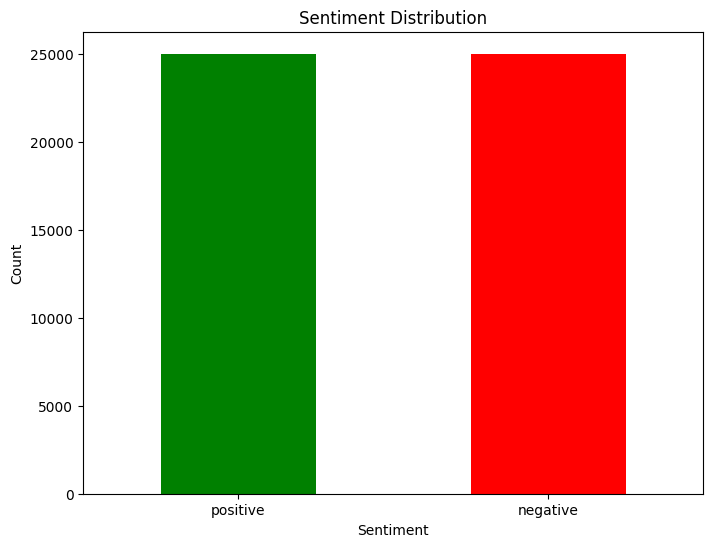

Text(0.5, 1.0, 'Sentiment Distribution')

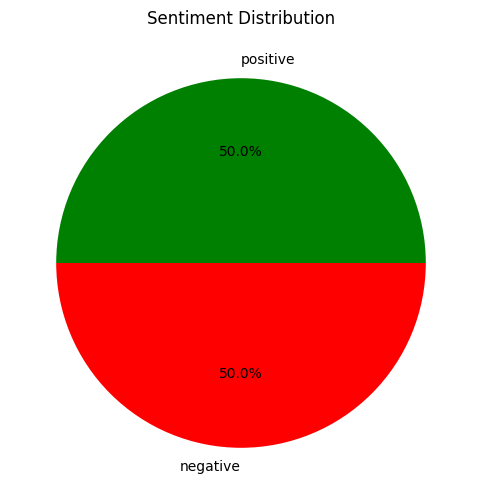

In [79]:
import matplotlib.pyplot as plt



# Plotting a bar chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.show()

# Plotting a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Sentiment Distribution')
